<table>
    <tr>
        <td>&nbsp;</td>
        <td>
            <table><tr>
            <tp>
                <h1 style="color:blue;text-align:center">Inteligencia Artificial Mini proyecto 3</h1
            </tp>
            <tp>
                <p style="font-size:150%;text-align:center">Ejercicio 1</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

# Dependencias

Al iniciar el notebook o reiniciar el kerner se pueden cargar todas las dependencias de este notebook corriendo las siguientes celdas. Este también es el lugar para instalar las dependencias que podrían hacer falta.

**De Python:**

In [1]:
# En linux o mac
#!pip3 install -r requirements.txt
#!pip install 'gymnasium[toy-text]'
#!pip install termcolor
#!pip install moviepy
# En windows
#!python -m pip install -r requirements.txt
#!python -m pip installgymnasium[toy-text]

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored, cprint
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
from gymnasium.wrappers import TimeLimit
import pygame
import pygame.surfarray

/Users/nataliacabrera/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Del notebook:**

In [2]:
from ambientes import *
from agents import *
from algoritmos import *
from utils import Episode, Experiment,gym_interpreter1
from plot_utils import PlotGridValues, Plot
from tests import *

In [3]:
class SARSA(Agent) :
    '''
    Implements a SARSA learning rule.
    '''

    def __init__(self, parameters:dict):
        super().__init__(parameters)
        self.alpha = self.parameters['alpha']
        self.debug = False
   
    def update(self, next_state, reward, done):
        '''
        Agent updates its model.
        '''
        # obtain previous state
        state = self.states[-1]
        # obtain previous action
        action = self.actions[-1]
        # Get next_action
        next_action = self.make_decision()
        # Find bootstrap
        estimate = reward + self.gamma*self.Q[next_state, next_action] # recompensa más descuento por valor del siguiente estado
        # Obtain delta
        delta = estimate - self.Q[state, action]  # Diferencia temporal: estimado menos valor del estado actual
        # Update Q value
        prev_Q = self.Q[state, action]
        self.Q[state, action] = prev_Q + self.alpha*(delta) # Actualizar en la dirección de delta por una fracción alfa
        # Update policy
        self.update_policy(state)
        if self.debug:
            print('')
            print(dash_line)
            print(f'Learning log:')
            print(f'state:{state}')
            print(f'action:{action}')
            print(f'reward:{reward}')
            print(f'estimate:{estimate}')
            print(f'Previous Q:{prev_Q}')
            print(f'delta:{delta}')
            print(f'New Q:{self.Q[state, action]}')


In [4]:
class Q_learning(Agent) :
    '''
    Implements a Q-learning rule.
    '''

    def __init__(self, parameters:dict):
        super().__init__(parameters)
        self.alpha = self.parameters['alpha']
        self.debug = False
   
    def update(self, next_state, reward, done):
        '''
        Agent updates its model.
        '''
        # obtain previous state
        state = self.states[-1] # Aquí estado previo
        # obtain previous action
        action = self.actions[-1]
        # Find bootstrap
        maxQ = self.max_Q(next_state) 
        estimate = reward + self.gamma*maxQ # Calcula el estimado
        # Obtain delta
        delta = estimate - self.Q[state,action] # Calcula el delta
        # Update Q value
        prev_Q = self.Q[state, action]
        self.Q[state, action] = prev_Q + self.alpha*(delta) # Actualiza el valor
        # Update policy
        self.update_policy(state) # Actualizar la política en el estado        
        if self.debug:
            print('')
            print(dash_line)
            print(f'Learning log:')
            print(f'state:{state}')
            print(f'action:{action}')
            print(f'reward:{reward}')
            print(f'estimate:{estimate}')
            print(f'Previous Q:{prev_Q}')
            print(f'delta:{delta}')
            print(f'New Q:{self.Q[state, action]}') 

## Ejercicio 1 <a class="anchor" id="ej1"></a>

Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	Running episodes:   0%|          | 0/500 [00:00<?, ?it/s]

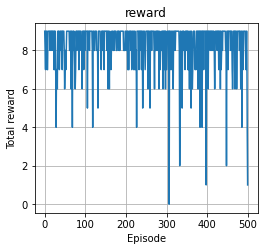

"\nepisode = Episode(environment=env,                   env_name='ABC',                   agent=agent,                   model_name='Random',                   num_rounds=100\n                )\n"

In [5]:
# Create environment
shape = (1,3)
env = ABC()
# Create agent
parameters = {\
    'nS': 3,\
    'nA': 2,\
    'gamma': 0.8,\
    'epsilon': 0.1,\
    'alpha': 0.1,\
}
agent_SARSA = SARSA(parameters=parameters)


#Create experiment
experiment = Experiment(environment=env,\
                        env_name='ABC', \
                        num_rounds=200, \
                        num_episodes=500, \
                        num_simulations=1)

# Train agent
agents = experiment.run_experiment(agents=[agent_SARSA],\
                                  names=['SARSA'], \
                                  measures=['reward'], \
                                  learn=True)

'''
episode = Episode(environment=env, \
                  env_name='ABC', \
                  agent=agent, \
                  model_name='Random', \
                  num_rounds=100
                )
'''


Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Average sum of rewards:
 model
Random    8.5
Name: reward, dtype: float64

Episode termination percentage:
 model
Random    100.0
Name: done, dtype: float64


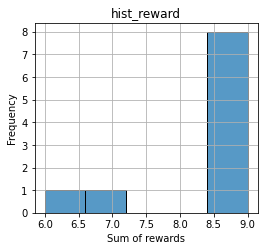

In [6]:
# Create experiment
experiment = Experiment(environment=env,\
                        env_name='ABC', \
                        num_rounds=10, \
                        num_episodes=10, \
                        num_simulations=1)
# Test agent already trained
agents = experiment.run_experiment(agents=[agent_SARSA],\
                                  names=['Random'], \
                                  measures=['hist_reward'], \
                                  learn=False)

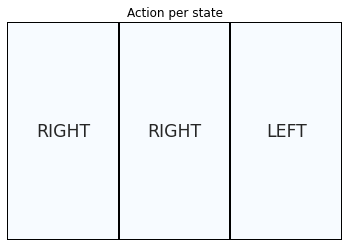

In [7]:
# Create environment
env = ABC()
shape=(1,3)
pp = PlotGridValues(shape=shape,dict_acciones=env.dict_acciones)
s_agent = agents[0]
p = s_agent.policy
policy = [np.argmax(p[s,]) for s in range(env.nS)]
pp.plot_policy(policy)

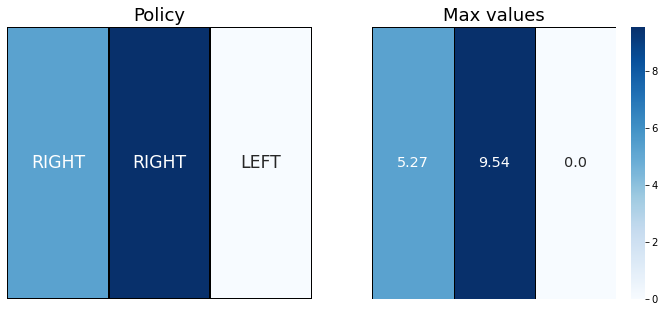

In [8]:
Q = [np.max(s_agent.Q[s,]) for s in range(env.nS)]
Q = np.vectorize(lambda x:round(x,2))(Q)
pp.plot_policy_and_values(policy,Q)


In [9]:
s_agent.Q

array([[3.07129778, 5.27316021],
       [3.01312833, 9.54254682],
       [0.        , 0.        ]])